# İki Örneklem Oran Testi

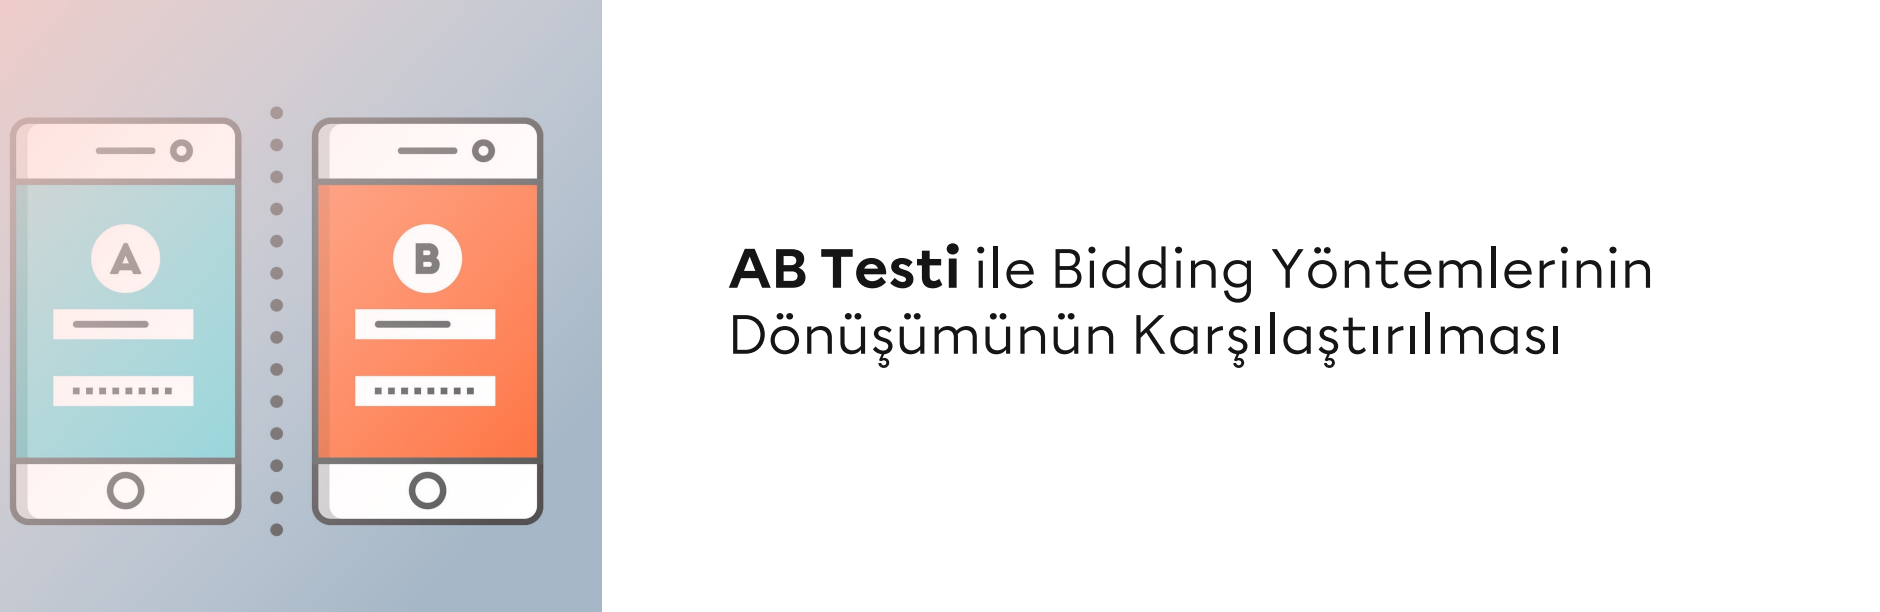

Bu çalışmada maximum bidding ile average bidding teklif türlerinin reklam görüntüleme sayılarından elde edilen tıklanma oranları kıyaslanacaktır.

**Gerekli kütüphanelerin kurulması**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu


pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

**Kontrol grubunun, yani maximum bidding veri setinin okutulması ve reklam görüntüleme sayıları ile tıklanma oranlarının incelenmesi. Değişkenlerin normal dağılıp dağılmadığını inceleyelim**

Impression: Reklam görüntüleme sayısı<br>
Click: Tıklanma sayısı

In [21]:
df_control = pd.read_excel('ab_testing.xlsx', sheet_name='Control Group')

In [22]:
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [23]:
df_control.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,101711.44907,20302.15786,45475.94296,85726.69035,99790.70108,115212.81654,147539.33633
Click,40.00000,5100.65737,1329.98550,2189.75316,4124.30413,5001.22060,5923.80360,7959.12507
Purchase,40.00000,550.89406,134.10820,267.02894,470.09553,531.20631,637.95709,801.79502
Earning,40.00000,1908.56830,302.91778,1253.98952,1685.84720,1975.16052,2119.80278,2497.29522


Değişkenlerin normal dağılıp dağılmadığını kontrol edelim.

H0: Veri normal dağılmıştır.<br>
H1: Veri normal dağılmamıştır.

In [24]:
test_stat, p_value = shapiro(df_control['Impression'])
print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))

Test statistic: 0.96967
p value: 0.35142


In [25]:
test_stat, p_value = shapiro(df_control['Click'])
print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))

Test statistic: 0.98442
p value: 0.84608


Kontrol grubu için hem reklam görüntüleme sayılarının hem de tıklanma sayılarının p value değerleri 0.05'ten büyük olduğu için H0 hipotezini red edemiyoruz. Her iki değişkende normal dağılmıştır.

**Test grubunun, yani average bidding veri setinin okutulması ve reklam görüntüleme sayıları ile tıklanma oranlarının incelenmesi. Ayrıca bu değişkenlerin normal dağılıp dağılmadığını kontrol edelim**

Impression: Reklam görüntüleme sayısı<br>
Click: Tıklanma sayısı

In [26]:
df_test = pd.read_excel('ab_testing.xlsx', sheet_name='Test Group')

In [27]:
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [28]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,120512.41176,18807.44871,79033.83492,112691.97077,119291.30077,132050.57893,158605.92048
Click,40.00000,3967.54976,923.09507,1836.62986,3376.81902,3931.35980,4660.49791,6019.69508
Purchase,40.00000,582.10610,161.15251,311.62952,444.62683,551.35573,699.86236,889.91046
Earning,40.00000,2514.89073,282.73085,1939.61124,2280.53743,2544.66611,2761.54540,3171.48971


Değişkenlerin normal dağılıp dağılmadığını kontrol edelim.

H0: Veri normal dağılmıştır.<br>
H1: Veri normal dağılmamıştır.

In [29]:
test_stat, p_value = shapiro(df_test['Impression'])
print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))

Test statistic: 0.97198
p value: 0.41482


In [30]:
test_stat, p_value = shapiro(df_test['Click'])
print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))

Test statistic: 0.98964
p value: 0.96992


Test grubu için de hem reklam görüntüleme sayılarının hem de tıklanma sayılarının p value değerleri 0.05'ten büyük olduğu için H0 hipotezini red edemiyoruz. Veri normal dağılmıştır.

**Oran Testi (Proportions Z Test)**

Kontrol grubu için reklamların toplam görünütlenme sayıları (Impression) ile toplam tıklanma sayılarını (Click) elde edelim.

In [31]:
total_impression_control = df_control['Impression'].sum()
total_click_control = df_control['Click'].sum()
print('Control Total Impression: %.5f\nControl Total Click: %.5f' % (total_impression_control, total_click_control))
print(f'Ratio: %.4f' % (total_click_control / total_impression_control))

Control Total Impression: 4068457.96271
Control Total Click: 204026.29490
Ratio: 0.0501


Test grubu için reklamların toplam görünütlenme sayıları (Impression) ile toplam tıklanma sayılarını (Click) elde edelim.

In [32]:
total_impression_test = df_test['Impression'].sum()
total_click_test = df_test['Click'].sum()
print('Control Total Impression: %.5f\nControl Total Click: %.5f' % (total_impression_test, total_click_test))
print(f'Ratio: %.4f' % (total_click_test / total_impression_test))

Control Total Impression: 4820496.47030
Control Total Click: 158701.99043
Ratio: 0.0329


Aradaki farkın istatistiksel olup olmadığını anlamak için oran testini yapıp p value değerini kontrol edelim.

H0: İki grupun görüntülenen reklamlarının tıklanma oranları arasında istatistiksel bir fark **YOKTUR**<br>
H1: İstatiksel bir fark vardır.

In [33]:
test_stat, p_value = proportions_ztest(count=(total_click_control, total_click_test),
                                      nobs=(total_impression_control, total_impression_test))
print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))

Test statistic: 129.33048
p value: 0.00000


**Sonuç: P value değeri 0.05'ten küçük olduğu için H0 hipotezini redediyoruz. Bu iki grubun tıklanma oranları arasında istatiksel açıdan anlamlı bir fark olduğu görülmektedir.**

**Oran testinin fonskiyonlaştırılması**

In [36]:
def z_test_of_proportions(control_group, test_group):
    
    total_impression_control = control_group['Impression'].sum()
    total_click_control = control_group['Click'].sum()
    print('Control Total Impression: %.5f\nControl Total Click: %.5f' % (total_impression_control, total_click_control))
    print(f'Ratio: %.4f' % (total_click_control / total_impression_control))
    print('\n-------------------------------------------------------------\n')
    
    total_impression_test = test_group['Impression'].sum()
    total_click_test = test_group['Click'].sum()
    print('Control Total Impression: %.5f\nControl Total Click: %.5f' % (total_impression_test, total_click_test))
    print(f'Ratio: %.4f' % (total_click_test / total_impression_test))
    print('\n-------------------------------------------------------------\n')
    
    test_stat, p_value = proportions_ztest(count=(total_click_control, total_click_test),
                                      nobs=(total_impression_control, total_impression_test))
    print('Test statistic: %.5f\np value: %.5f' % (test_stat, p_value))
    
    if p_value < 0.05:
        print('We reject the H0 hypothesis. There is statistical difference between two propotions.')
    else:
        print('We can not reject the H0 hypothesis.There is no statistical difference between two propotions.')

In [37]:
z_test_of_proportions(df_control, df_test)

Control Total Impression: 4068457.96271
Control Total Click: 204026.29490
Ratio: 0.0501

-------------------------------------------------------------

Control Total Impression: 4820496.47030
Control Total Click: 158701.99043
Ratio: 0.0329

-------------------------------------------------------------

Test statistic: 129.33048
p value: 0.00000
We reject the H0 hypothesis. There is statistical difference between two propotions.
